<h1>Linear regression using multiple Variables </h1>
This is for the prediction of houe prices with multiple features 

In [13]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [4]:
df.bedrooms.median()

np.float64(4.0)

In [5]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())

In [6]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [7]:
reg = LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

LinearRegression()

In [8]:
reg.intercept_

np.float64(221323.0018654043)

In [9]:
reg.coef_


array([  112.06244194, 23388.88007794, -3231.71790863])

In [10]:
reg.predict([[3000, 3, 40]])

C:\Users\Pauras\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

END HERE BELOW IS TEST CODE 

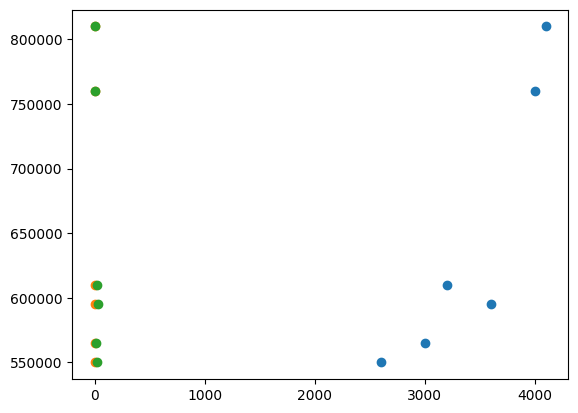

In [15]:
plt.scatter(df.area,df.price)
plt.scatter(df.bedrooms,df.price)
plt.scatter(df.age,df.price)

In [16]:
df[['area', 'bedrooms', 'age']]

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [17]:
X = df[['area', 'bedrooms', 'age']]
y = df['price']

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)  # You can try degree=3 or more for more complexity
X_poly = poly.fit_transform(X_scaled)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [22]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4592308801.892473
